1. CHARGEMENT ET EXPLORATION DES DONNÉES

========= Dataset summary =========

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB

========= A few first samples =========

   fi

/tmp/ipython-input-179185086.py:56: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)



2. CLASSIFICATION PAR K-NN

Taille de l'ensemble d'entraînement: 1632
Taille de l'ensemble de validation: 1633
Taille de l'ensemble de test: 1633

========= Test initial avec k=3 =========

Taux d'erreur sur validation avec k=3: 0.3454
Précision sur validation avec k=3: 65.46%

========= Recherche du meilleur k =========

Meilleur k trouvé: k* = 1
Erreur minimale sur validation: 0.3184
Précision correspondante: 68.16%

========= Résultats finaux (sans normalisation) =========
k optimal: 1
Erreur sur test: 0.3043
Précision sur test: 69.57%

3. CLASSIFICATION AVEC NORMALISATION

Normalisation appliquée:
- Centrage: moyenne = 0
- Réduction: écart-type = 1

Meilleur k trouvé (normalisé): k* = 23
Erreur minimale sur validation: 0.2462
Précision correspondante: 75.38%

========= Résultats finaux (avec normalisation) =========
k optimal: 23
Erreur sur test: 0.2486
Précision sur test: 75.14%

4. COMPARAISON FINALE

| Méthode              | k optimal | Erreur Test | Précision Test |
|---------

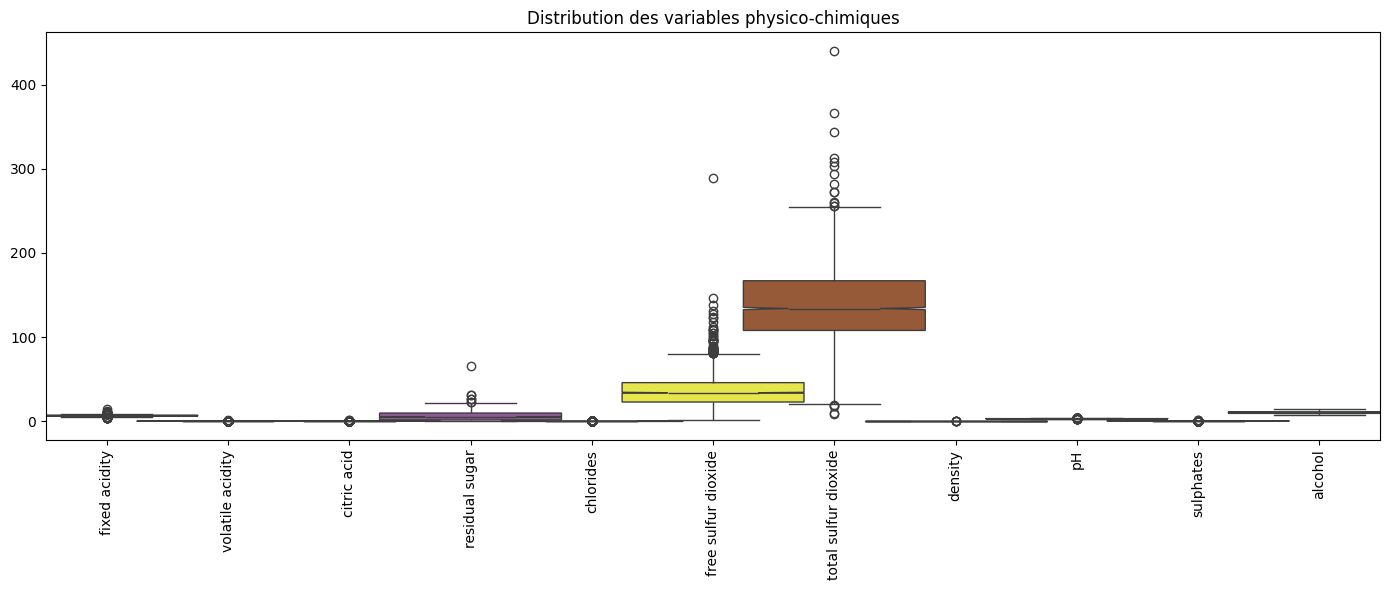

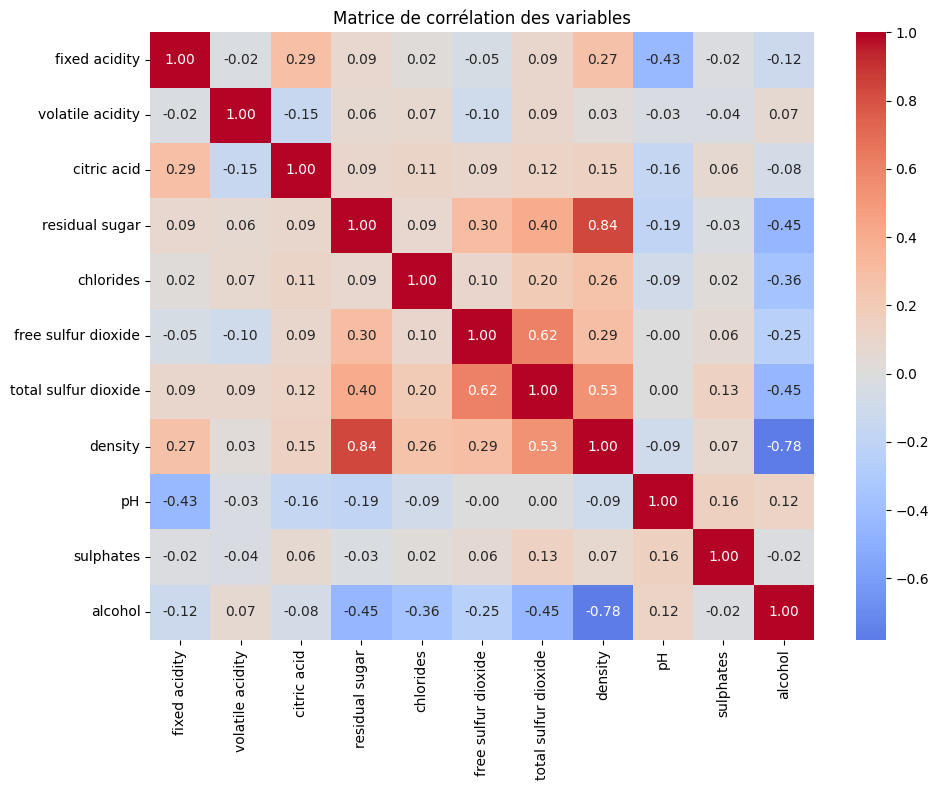

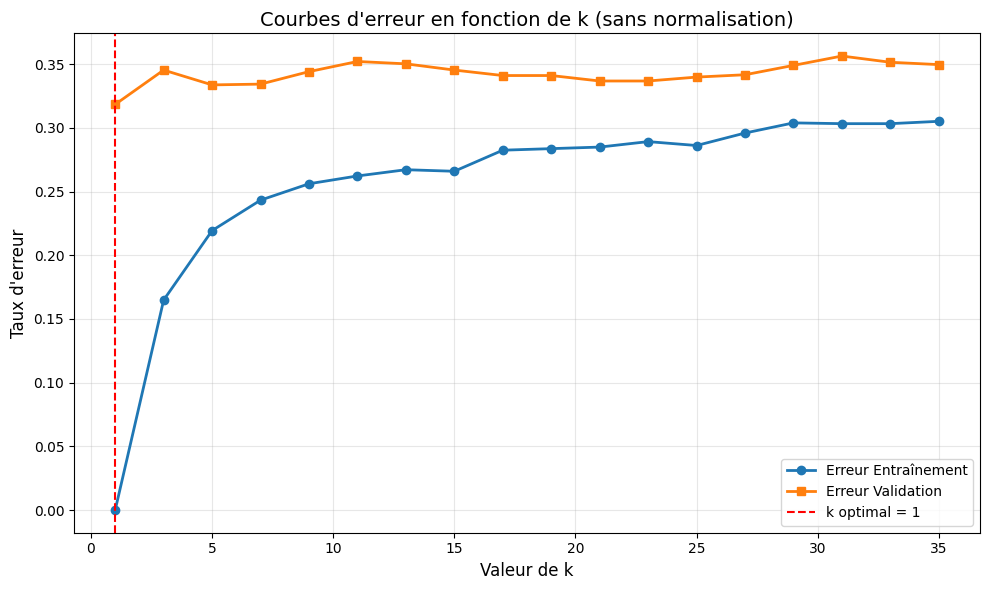

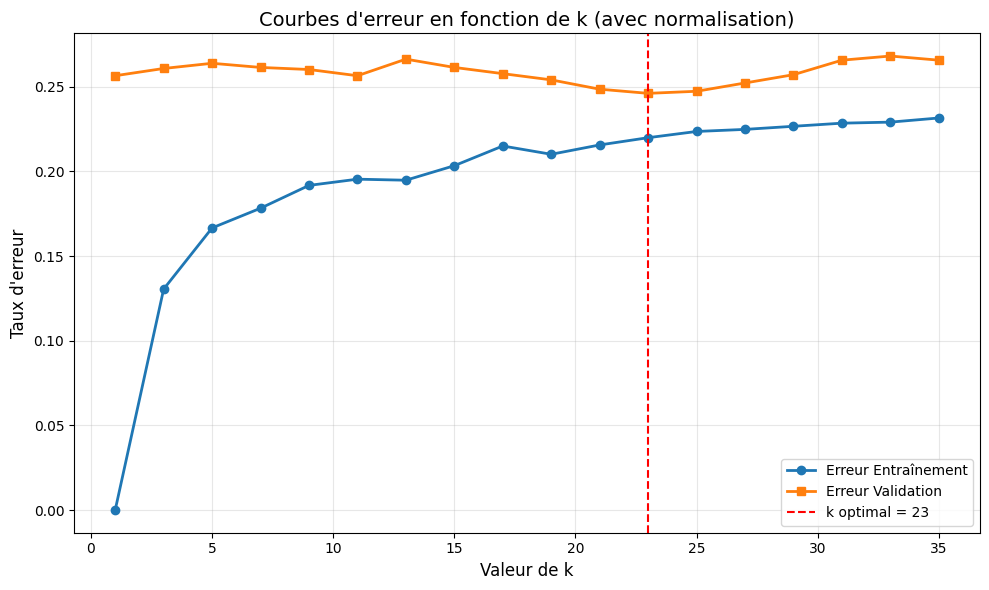

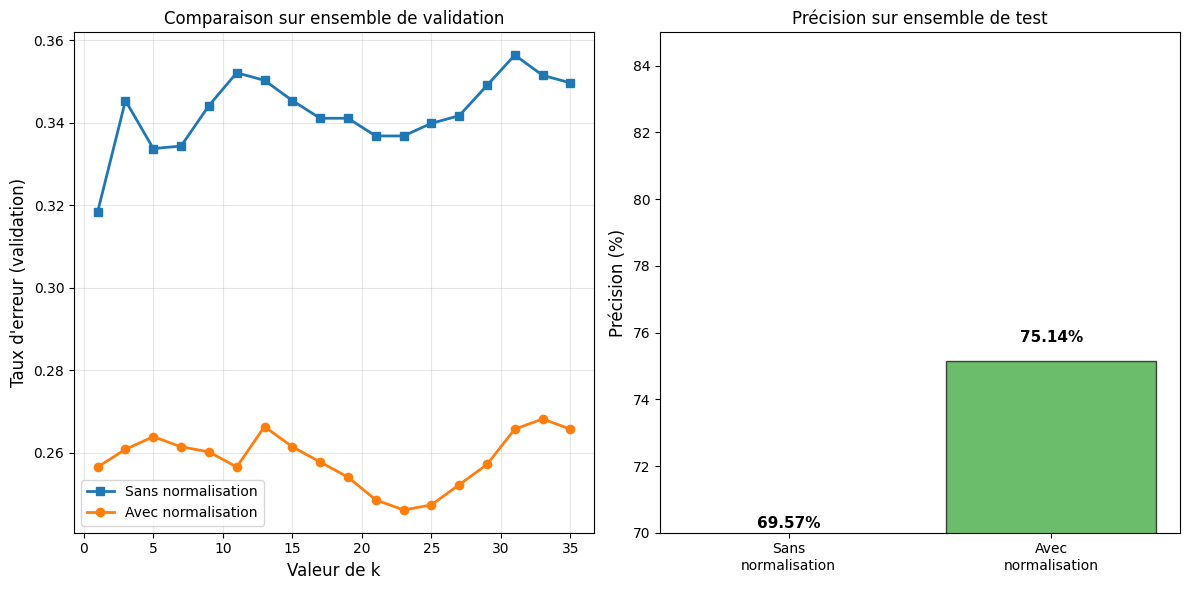

In [1]:
# ============================================================================
# TP Machine Learning - Classification de la Qualité des Vins
# ENCG Settat - Mr Larhlimi
# ============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# ============================================================================
# 1. ANALYSE DES DONNÉES
# ============================================================================

print("="*70)
print("1. CHARGEMENT ET EXPLORATION DES DONNÉES")
print("="*70)

# 1.1 Chargement des données
link = "http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"
df = pd.read_csv(link, header="infer", delimiter=";")

print("\n========= Dataset summary =========\n")
df.info()

print("\n========= A few first samples =========\n")
print(df.head())

# 1.2 Formation des arrays X et Y
X = df.drop("quality", axis=1)  # On enlève la colonne "quality"
Y = df["quality"]

print("\n========= Wine Qualities =========\n")
print(Y.value_counts())

# 1.3 Classification binaire
# Mauvais vin (y=0) : qualité <= 5 et bon vin (y=1) sinon
Y = [0 if val <= 5 else 1 for val in Y]
Y = pd.Series(Y)

print("\n========= Distribution des classes (0=mauvais, 1=bon) =========\n")
print(pd.Series(Y).value_counts())

# 1.4 Analyse statistique
print("\n========= Statistiques descriptives =========\n")
print(X.describe())

# Visualisations
plt.figure(figsize=(14, 6))
ax = plt.gca()
sns.boxplot(data=X, orient="v", palette="Set1", width=1.5, notch=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title("Distribution des variables physico-chimiques")
plt.tight_layout()
plt.savefig('boxplot_features.png', dpi=300, bbox_inches='tight')

plt.figure(figsize=(10, 8))
corr = X.corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title("Matrice de corrélation des variables")
plt.tight_layout()
plt.savefig('correlation_matrix.png', dpi=300, bbox_inches='tight')

# ============================================================================
# 2. CLASSIFICATION
# ============================================================================

print("\n" + "="*70)
print("2. CLASSIFICATION PAR K-NN")
print("="*70)

# 2.1 Division des données
Xa, Xt, Ya, Yt = train_test_split(X, Y, shuffle=True, test_size=1/3, stratify=Y)
Xa, Xv, Ya, Yv = train_test_split(Xa, Ya, shuffle=True, test_size=0.5, stratify=Ya)

print(f"\nTaille de l'ensemble d'entraînement: {len(Xa)}")
print(f"Taille de l'ensemble de validation: {len(Xv)}")
print(f"Taille de l'ensemble de test: {len(Xt)}")

# 2.2 k-NN avec k=3 (démarrage)
print("\n========= Test initial avec k=3 =========\n")
k = 3
clf = KNeighborsClassifier(n_neighbors=k)
clf.fit(Xa, Ya)

Ypred_v = clf.predict(Xv)
error_v = 1 - accuracy_score(Yv, Ypred_v)
print(f"Taux d'erreur sur validation avec k={k}: {error_v:.4f}")
print(f"Précision sur validation avec k={k}: {(1-error_v)*100:.2f}%")

# 2.3 k-NN pour différentes valeurs de k
print("\n========= Recherche du meilleur k =========\n")
k_vector = np.arange(1, 37, 2)
error_train = np.empty(k_vector.shape)
error_val = np.empty(k_vector.shape)

for ind, k in enumerate(k_vector):
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(Xa, Ya)

    # Prédiction et évaluation sur l'ensemble d'entraînement
    Ypred_train = clf.predict(Xa)
    error_train[ind] = 1 - accuracy_score(Ya, Ypred_train)

    # Prédiction et évaluation sur l'ensemble de validation
    Ypred_val = clf.predict(Xv)
    error_val[ind] = 1 - accuracy_score(Yv, Ypred_val)

# Sélection du meilleur k
err_min, ind_opt = error_val.min(), error_val.argmin()
k_star = k_vector[ind_opt]

print(f"Meilleur k trouvé: k* = {k_star}")
print(f"Erreur minimale sur validation: {err_min:.4f}")
print(f"Précision correspondante: {(1-err_min)*100:.2f}%")

# Visualisation des courbes d'erreur
plt.figure(figsize=(10, 6))
plt.plot(k_vector, error_train, 'o-', label='Erreur Entraînement', linewidth=2)
plt.plot(k_vector, error_val, 's-', label='Erreur Validation', linewidth=2)
plt.axvline(x=k_star, color='r', linestyle='--', label=f'k optimal = {k_star}')
plt.xlabel('Valeur de k', fontsize=12)
plt.ylabel('Taux d\'erreur', fontsize=12)
plt.title('Courbes d\'erreur en fonction de k (sans normalisation)', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('error_curves_raw.png', dpi=300, bbox_inches='tight')

# Évaluation sur le test avec k*
clf_final = KNeighborsClassifier(n_neighbors=k_star)
clf_final.fit(Xa, Ya)
Ypred_test = clf_final.predict(Xt)
error_test = 1 - accuracy_score(Yt, Ypred_test)

print(f"\n========= Résultats finaux (sans normalisation) =========")
print(f"k optimal: {k_star}")
print(f"Erreur sur test: {error_test:.4f}")
print(f"Précision sur test: {(1-error_test)*100:.2f}%")

# ============================================================================
# 3. NORMALISATION DES DONNÉES
# ============================================================================

print("\n" + "="*70)
print("3. CLASSIFICATION AVEC NORMALISATION")
print("="*70)

# 3.1 Normalisation des données
sc = StandardScaler(with_mean=True, with_std=True)
sc = sc.fit(Xa)  # Fit uniquement sur l'ensemble d'entraînement
Xa_n = sc.transform(Xa)
Xv_n = sc.transform(Xv)
Xt_n = sc.transform(Xt)

print("\nNormalisation appliquée:")
print("- Centrage: moyenne = 0")
print("- Réduction: écart-type = 1")

# 3.2 k-NN avec données normalisées
error_train_n = np.empty(k_vector.shape)
error_val_n = np.empty(k_vector.shape)

for ind, k in enumerate(k_vector):
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(Xa_n, Ya)

    Ypred_train = clf.predict(Xa_n)
    error_train_n[ind] = 1 - accuracy_score(Ya, Ypred_train)

    Ypred_val = clf.predict(Xv_n)
    error_val_n[ind] = 1 - accuracy_score(Yv, Ypred_val)

# Sélection du meilleur k avec normalisation
err_min_n, ind_opt_n = error_val_n.min(), error_val_n.argmin()
k_star_n = k_vector[ind_opt_n]

print(f"\nMeilleur k trouvé (normalisé): k* = {k_star_n}")
print(f"Erreur minimale sur validation: {err_min_n:.4f}")
print(f"Précision correspondante: {(1-err_min_n)*100:.2f}%")

# Visualisation avec normalisation
plt.figure(figsize=(10, 6))
plt.plot(k_vector, error_train_n, 'o-', label='Erreur Entraînement', linewidth=2)
plt.plot(k_vector, error_val_n, 's-', label='Erreur Validation', linewidth=2)
plt.axvline(x=k_star_n, color='r', linestyle='--', label=f'k optimal = {k_star_n}')
plt.xlabel('Valeur de k', fontsize=12)
plt.ylabel('Taux d\'erreur', fontsize=12)
plt.title('Courbes d\'erreur en fonction de k (avec normalisation)', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('error_curves_normalized.png', dpi=300, bbox_inches='tight')

# Évaluation finale sur test avec normalisation
clf_final_n = KNeighborsClassifier(n_neighbors=k_star_n)
clf_final_n.fit(Xa_n, Ya)
Ypred_test_n = clf_final_n.predict(Xt_n)
error_test_n = 1 - accuracy_score(Yt, Ypred_test_n)

print(f"\n========= Résultats finaux (avec normalisation) =========")
print(f"k optimal: {k_star_n}")
print(f"Erreur sur test: {error_test_n:.4f}")
print(f"Précision sur test: {(1-error_test_n)*100:.2f}%")

# ============================================================================
# 4. COMPARAISON DES RÉSULTATS
# ============================================================================

print("\n" + "="*70)
print("4. COMPARAISON FINALE")
print("="*70)

print("\n| Méthode              | k optimal | Erreur Test | Précision Test |")
print("|----------------------|-----------|-------------|----------------|")
print(f"| Sans normalisation   | {k_star:9d} | {error_test:11.4f} | {(1-error_test)*100:13.2f}% |")
print(f"| Avec normalisation   | {k_star_n:9d} | {error_test_n:11.4f} | {(1-error_test_n)*100:13.2f}% |")

# Comparaison graphique
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(k_vector, error_val, 's-', label='Sans normalisation', linewidth=2)
plt.plot(k_vector, error_val_n, 'o-', label='Avec normalisation', linewidth=2)
plt.xlabel('Valeur de k', fontsize=12)
plt.ylabel('Taux d\'erreur (validation)', fontsize=12)
plt.title('Comparaison sur ensemble de validation', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
methods = ['Sans\nnormalisation', 'Avec\nnormalisation']
accuracies = [(1-error_test)*100, (1-error_test_n)*100]
colors = ['#ff7f0e', '#2ca02c']
bars = plt.bar(methods, accuracies, color=colors, alpha=0.7, edgecolor='black')
plt.ylabel('Précision (%)', fontsize=12)
plt.title('Précision sur ensemble de test', fontsize=12)
plt.ylim([70, 85])
for bar, acc in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
             f'{acc:.2f}%', ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.savefig('comparison_final.png', dpi=300, bbox_inches='tight')

print("\n" + "="*70)
print("ANALYSE TERMINÉE - Graphiques sauvegardés")
print("="*70)

plt.show()